In [55]:
import seml
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from lataq.metrics.metrics import metrics
from lataq_reproduce.exp_dict import EXPERIMENT_INFO

# Get results for SCANVI, SCVI, MARS, SVM

In [56]:
results = {}

In [57]:
results['scanvi'] = seml.get_results('scanvi', to_data_frame=True)
for score in list(results['scanvi']['result.integration_scores'].loc[0].columns):
    results['scanvi'][f'result.{score}'] = results['scanvi']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['scanvi']['result.f1-score-macro'] = results['scanvi']['result.classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['scanvi']['result.f1-score-weighted'] = results['scanvi']['result.classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['scanvi'] = results['scanvi'][[
    'config.data',
    'result.reference_time',
    'result.query_time',
    'result.PCR_batch',
    'result.graph_conn',
    'result.ebm',
    'result.knn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['scanvi'] = results['scanvi'].assign(method='scanvi')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [58]:
results['scvi'] = seml.get_results('scvi', to_data_frame=True)
for score in list(results['scvi']['result.integration_scores'].loc[0].columns):
    results['scvi'][f'result.{score}'] = results['scvi']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['scvi'] = results['scvi'][[
    'config.data',
    'result.reference_time',
    'result.query_time',
    'result.PCR_batch',
    'result.graph_conn',
    'result.ebm',
    'result.knn',
]]
results['scvi'] = results['scvi'].assign(method='scvi')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [59]:
results['svm'] = seml.get_results('svm', to_data_frame=True)
results['svm']['result.f1-score-macro'] = results['svm']['result'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['svm']['result.f1-score-weighted'] = results['svm']['result'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['svm'] = results['svm'][[
    'config.data',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['svm'] = results['svm'].assign(method='svm')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [60]:
results['mars'] = seml.get_results('mars', to_data_frame=True)
results['mars']['result.f1-score-macro'] = results['mars']['result.classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['mars']['result.f1-score-weighted'] = results['mars']['result.classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['mars'] = results['mars'][[
    'config.data',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['mars'] = results['mars'].assign(method='mars')

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

# Get best results from hyperopt

In [61]:
results_lataq = seml.get_results('hyperparam_fixed', to_data_frame=True)

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 0/360 [00:00<?, ?it/s]

In [62]:
results['tranvae'] = results_lataq[results_lataq['config.model']=='tranvae']
for score in list(results['tranvae']['result.integration_scores'].iloc[0].columns):
    results['tranvae'][f'result.{score}'] = results['tranvae']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['tranvae']['result.f1-score-macro'] = results['tranvae']['result.classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['tranvae']['result.f1-score-weighted'] = results['tranvae']['result.classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['tranvae'] = results['tranvae'][[
    'config.data',
    'result.ebm',
    'result.knn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['tranvae'] = results['tranvae'].assign(method='tranvae')
results['tranvae'] = (
    results['tranvae']
    .sort_values(by='result.f1-score-weighted')
    .groupby('config.data')
    .last()
    .reset_index()
)

<ipython-input-62-4e8dc88e9f0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['tranvae'][f'result.{score}'] = results['tranvae']['result.integration_scores'].apply(
<ipython-input-62-4e8dc88e9f0a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['tranvae']['result.f1-score-macro'] = results['tranvae']['result.classification_report_query'].apply(
<ipython-input-62-4e8dc88e9f0a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [63]:
results['embedcvae'] = results_lataq[results_lataq['config.model']=='embedcvae']
for score in list(results['embedcvae']['result.integration_scores'].iloc[0].columns):
    results['embedcvae'][f'result.{score}'] = results['embedcvae']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['embedcvae']['result.f1-score-macro'] = results['embedcvae']['result.classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['embedcvae']['result.f1-score-weighted'] = results['embedcvae']['result.classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['embedcvae'] = results['embedcvae'][[
    'config.data',
    'result.ebm',
    'result.knn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['embedcvae'] = results['embedcvae'].assign(method='embedcvae')
results['embedcvae'] = (
    results['embedcvae']
    .sort_values(by='result.f1-score-weighted')
    .groupby('config.data')
    .last()
    .reset_index()
)

<ipython-input-63-0041a85f938e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['embedcvae'][f'result.{score}'] = results['embedcvae']['result.integration_scores'].apply(
<ipython-input-63-0041a85f938e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['embedcvae']['result.f1-score-macro'] = results['embedcvae']['result.classification_report_query'].apply(
<ipython-input-63-0041a85f938e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

# Get results for symphony and seurat

In [64]:
r_scores = pd.read_pickle('seurat/result_seurat_symphony.pickle')


In [65]:
r_scores['method'][~r_scores['classification_report'].isna()] = 'seurat'

In [66]:
results['seurat'] = r_scores[r_scores['method'] == 'seurat']
results['symphony'] = r_scores[r_scores['method'] == 'symphony']

In [67]:
for score in list(results['seurat']['integration_scores'].iloc[0].columns):
    results['seurat'][f'{score}'] = results['seurat']['integration_scores'].apply(
        lambda x: x[score]
    )
results['seurat']['f1-score-macro'] = results['seurat']['classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['seurat']['f1-score-weighted'] = results['seurat']['classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['seurat'].columns = [
    f'result.{x}' 
    if i > 1 
    else f'config.{x}'
    for i, x 
    in enumerate(
        results['seurat'].columns
    )
]
results['seurat'] = results['seurat'][[
    'config.data',
    'result.ebm',
    'result.knn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['seurat'] = results['seurat'].assign(method='seurat')

<ipython-input-67-e6ae020c46ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['seurat'][f'{score}'] = results['seurat']['integration_scores'].apply(
<ipython-input-67-e6ae020c46ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['seurat']['f1-score-macro'] = results['seurat']['classification_report_query'].apply(
<ipython-input-67-e6ae020c46ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [68]:
for score in list(results['symphony']['integration_scores'].iloc[0].columns):
    results['symphony'][f'{score}'] = results['symphony']['integration_scores'].apply(
        lambda x: x[score]
    )
results['symphony'].columns = [
    f'result.{x}' 
    if i > 1 
    else f'config.{x}'
    for i, x 
    in enumerate(
        results['symphony'].columns
    )
]
results['symphony'] = results['symphony'][[
    'config.data',
    'result.ebm',
    'result.knn',
]]
results['symphony'] = results['symphony'].assign(method='symphony')

<ipython-input-68-8b4aa49d0626>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['symphony'][f'{score}'] = results['symphony']['integration_scores'].apply(


In [69]:
results = pd.concat(results.values())

# Visualization

In [70]:
integration_methods = ['scanvi', 'scvi', 'seurat', 'symphony', 'tranvae', 'embedcvae']
classification_methods = ['scanvi', 'seurat', 'svm', 'mars', 'tranvae', 'embedcvae']

In [76]:
results

,config.data,result.reference_time,result.query_time,result.PCR_batch,result.graph_conn,result.ebm,result.knn,result.f1-score-macro,result.f1-score-weighted,method
0,pancreas,343.958084,37.186265,0.673290,0.839503,0.481371,0.880166,0.637686,0.959443,scanvi
1,pbmc,511.986250,35.446502,0.814409,0.985532,0.488167,0.903543,0.686802,0.893522,scanvi
2,brain,1030.792785,782.916334,0.000000,0.983772,0.169206,0.921403,0.630583,0.836046,scanvi
3,scvelo,381.336692,100.982230,0.000000,0.983480,0.514798,0.743141,0.305524,0.397358,scanvi
4,tumor,1138.518293,689.298029,0.000000,0.757058,0.227003,0.620419,0.281305,0.449389,scanvi
5,lung,480.391367,130.871448,0.000000,0.809649,0.082713,0.880576,0.404742,0.558878,scanvi
0,pancreas,305.027829,34.177540,0.739987,0.849049,0.476725,0.859734,NaN,NaN,scvi
1,pbmc,485.604269,33.067524,0.852156,0.939715,0.487416,0.872595,NaN,NaN,scvi
2,brain,458.334903,810.245600,0.000000,0.982785,0.154869,0.917096,NaN,NaN,scvi
3,scvelo,364.298118,94.277753,0.072850,0.982746,0.512711,0.701833,NaN,NaN,scvi


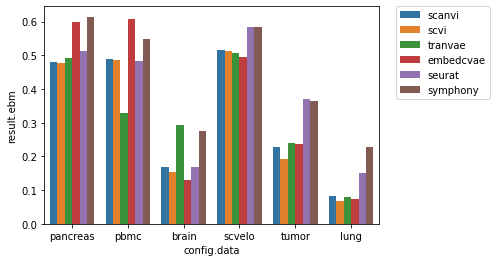

In [71]:
sns.barplot(
    x='config.data', 
    y='result.ebm', 
    hue='method', 
    data=results[results['method'].isin(integration_methods)]
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

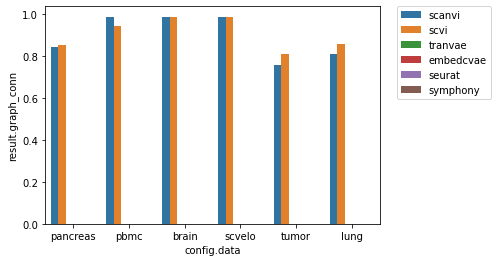

In [77]:
sns.barplot(
    x='config.data', 
    y='result.graph_conn', 
    hue='method', 
    data=results[results['method'].isin(integration_methods)]
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

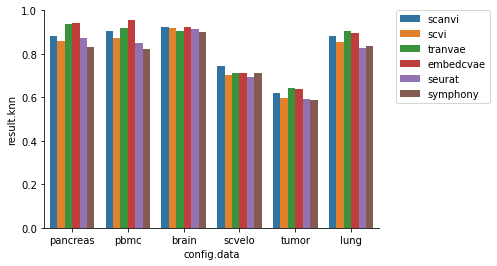

In [75]:
sns.barplot(
    x='config.data', 
    y='result.knn', 
    hue='method', 
    data=results[results['method'].isin(integration_methods)]
)
plt.ylim([0, 1])
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

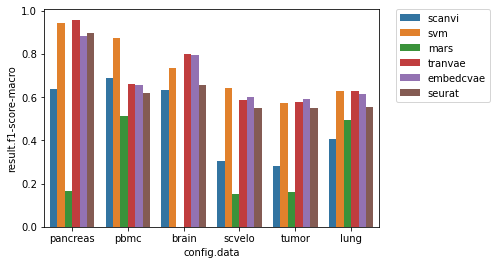

In [73]:
sns.barplot(
    x='config.data',
    y='result.f1-score-macro',
    hue='method',
    data=results[results['method'].isin(classification_methods)]
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

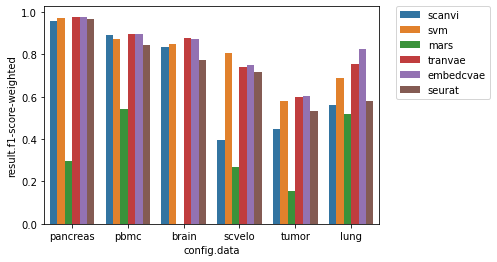

In [74]:
sns.barplot(
    x='config.data',
    y='result.f1-score-weighted',
    hue='method',
    data=results[results['method'].isin(classification_methods)]
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)